In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/dir_vec/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))


In [39]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['HarnessVec'])
importlib.reload(sys.modules['ParallelRunnerVec'])
importlib.reload(sys.modules['DirichletPolicyVec'])

<module 'DirichletPolicyVec' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/dir_vec/DirichletPolicyVec.py'>

In [40]:
from GenerativeMarketEnv import GenerativeMarketEnv
from DirichletPolicyVec import DirichletPolicyVec
from HarnessVec import HarnessVec
from ParallelRunnerVec import ParallelRunnerVec
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

# Investigation of the Viability of the Dirichlet Policy on Real Stock

This notebook looks at optimising for real stocks.  We calculate the empirical means and covariance matrices of a number of stocks and create a generative environment (multivariate Gaussian). This enables us to plot the efficient frontier for the assets (blue line in plots is EF, yellow crosses are the assets) and the maximum Sharpe ratio (pink cross).

We then learn the policy, first optimising for returns and then the differential Sharpe ratio. Once a policy has been learned we generate a series of returns and plot the empirical mean return and volatility (cyan dots). 

In [6]:
# stocks to consider 
stocks = ['AAPL' ,'ADBE' ,'ADI' ,'ADP' ,'ADSK' ,'AEP' ,'ALGN' ,'ALXN' ,'AMAT' ,'AMD' ,'AMGN' ,'AMZN' ,'ANSS' ,'ASML' ,'ATVI'
 ,'AVGO' ,'BIDU' ,'BIIB' ,'BKNG' ,'CDNS' ,'CDW' ,'CERN' ,'CHKP' ,'CHTR' ,'CMCSA' ,'COST' ,'CPRT' ,'CSCO' ,'CSX' ,'CTAS'
 ,'CTSH' ,'DLTR' ,'DOCU' ,'DXCM' ,'EA' ,'EBAY' ,'EXC' ,'FAST' ,'FB' ,'FISV' ,'FOX' ,'FOXA' ,'GILD' ,'GOOG' ,'GOOGL'
 ,'IDXX' ,'ILMN' ,'INCY' ,'INTC' ,'INTU' ,'ISRG' ,'JD' ,'KDP' ,'KHC' ,'KLAC' ,'LRCX' ,'LULU' ,'MAR' ,'MCHP' ,'MDLZ'
 ,'MELI' ,'MNST' ,'MRNA' ,'MRVL' ,'MSFT' ,'MTCH' ,'MU' ,'MXIM' ,'NFLX' ,'NTES' ,'NVDA' ,'NXPI' ,'OKTA' ,'ORLY' ,'PAYX'
 ,'PCAR' ,'PDD' ,'PEP' ,'PTON' ,'PYPL' ,'QCOM' ,'REGN' ,'ROST' ,'SBUX' ,'SGEN' ,'SIRI' ,'SNPS' ,'SPLK' ,'SWKS' ,'TCOM'
 ,'TEAM' ,'TMUS' ,'TSLA' ,'TXN' ,'VRSK' ,'VRSN' ,'VRTX' ,'WBA' ,'WDAY' ,'XEL' ,'XLNX' ,'ZM']

## Maximising Returns of Real Stocks

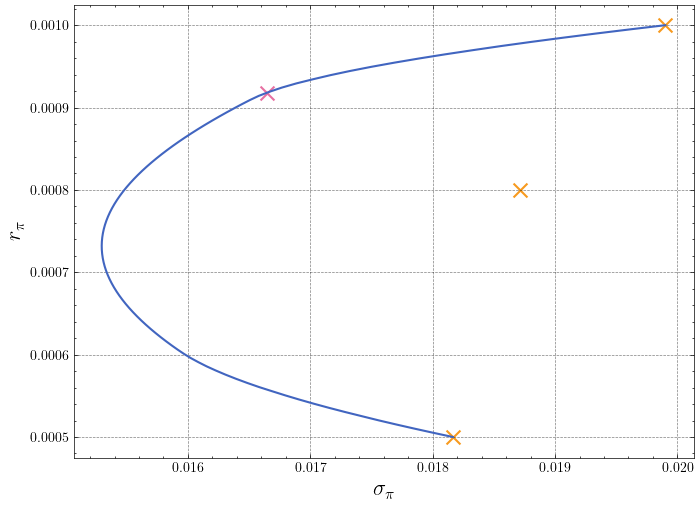

0.05515837380054389

In [32]:
μ = [0.0005, 0.001 , 0.0008]
Σ = [[0.0003, 0.0002, 0.00015678],
     [0.0002051 , 0.0003, 0.00016585],
     [0.00015678, 0.00016585, 0.0003]]

market = GenerativeMarketEnv(μ, Σ)
market.plot_efficient_frontier()

In [42]:
params = {
    'n_assets': 3,
    'α': 2,
    'α_end': 9e-3,
    'start_ep': 10000, 
    'α_decay_steps': 5000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 20000
}

p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 2688.14it/s]
1it [04:57, 297.70s/it]


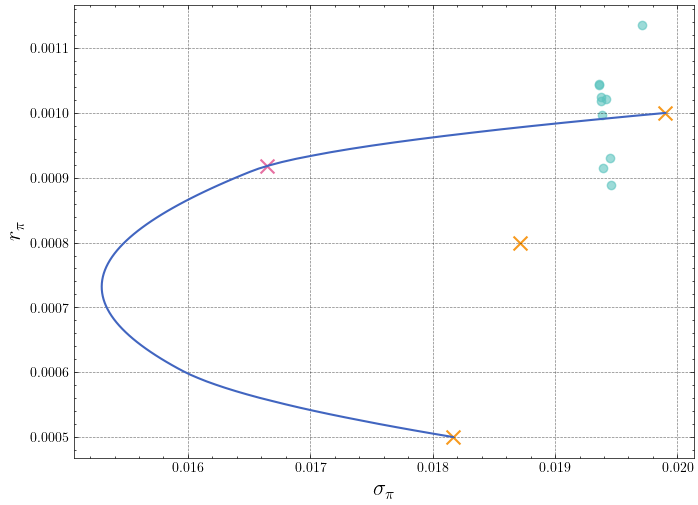

0.05515837380054389

In [43]:
market.plot_efficient_frontier(stds = stds, returns = means)

In [44]:
params_1 = {
    'n_assets': 3,
    'α': 0.005,
    'α_end': 0.001,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 15000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 22.45it/s]
1it [07:35, 455.14s/it]


In [ ]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
market.plot_efficient_frontier(stds = stds, returns = means)

### 10 Stocks

In [27]:
random.shuffle(stocks)
sampled_stocks_10 = stocks[:3]

[*********************100%***********************]  3 of 3 completed


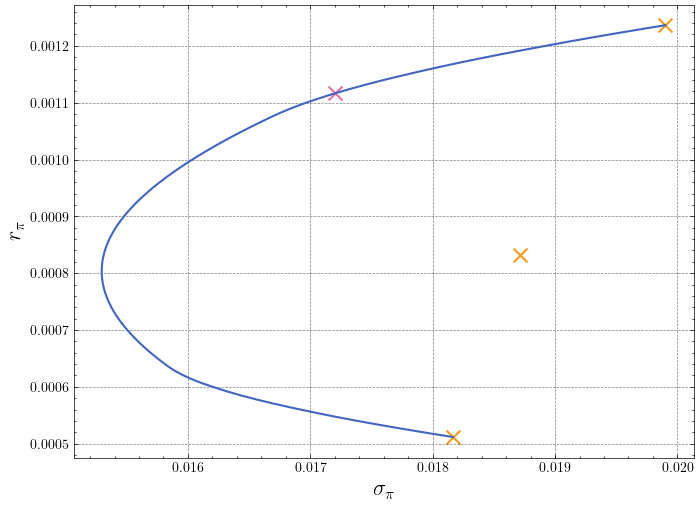

0.0649017791673423

In [28]:
factory = MarketFactory(sampled_stocks_10, "2017-01-01", "2020-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [30]:
market.μ

array([0.00051177, 0.0012363 , 0.00083261])

In [31]:
market.Σ

array([[0.00032999, 0.0002051 , 0.00015678],
       [0.0002051 , 0.00039607, 0.00016585],
       [0.00015678, 0.00016585, 0.00035026]])

[*********************100%***********************]  10 of 10 completed


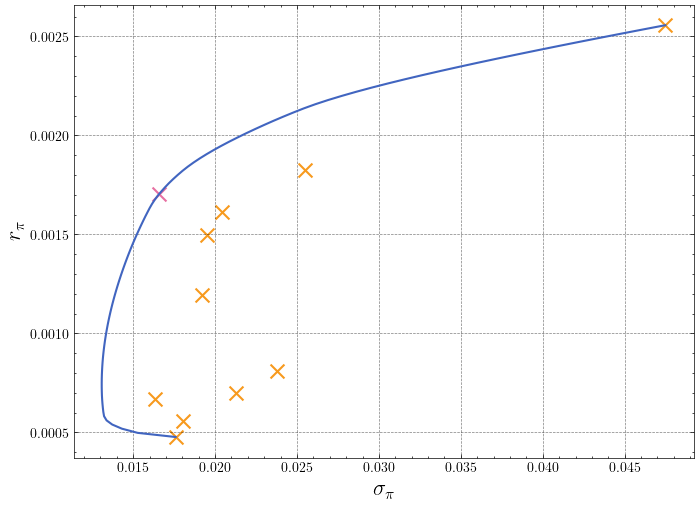

0.1027272313852195

In [9]:
factory = MarketFactory(sampled_stocks_10, "2017-01-01", "2020-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [ ]:
params = {
    'n_assets': len(sampled_stocks_10),
    'α': 2,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 10000
}

p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

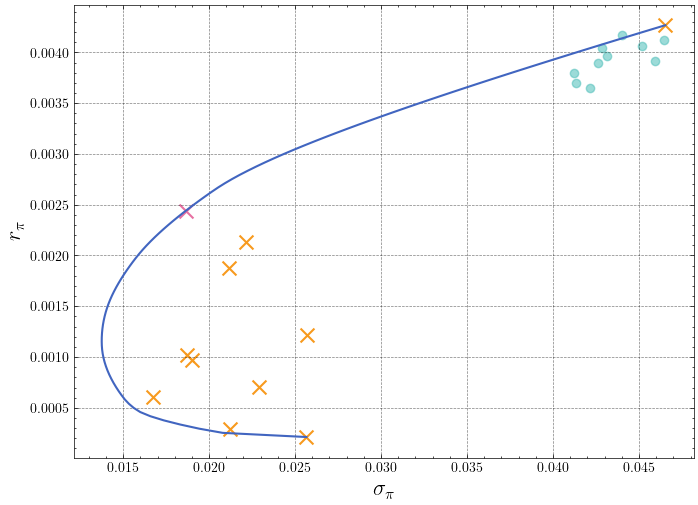

In [24]:
market.plot_efficient_frontier(stds = stds, returns = means)

### 15 stocks

In [29]:
random.shuffle(stocks)
sampled_stocks_15 = stocks[:15]

[*********************100%***********************]  15 of 15 completed


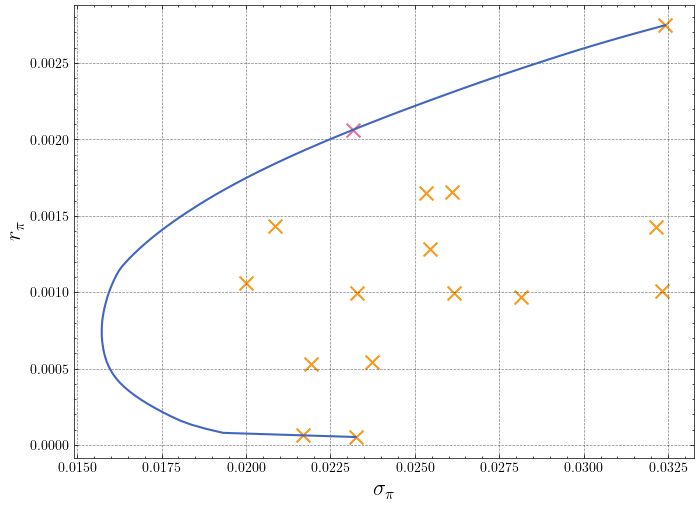

In [30]:
factory = MarketFactory(sampled_stocks_15, "2019-04-30", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [53]:
params = {
    'n_assets': len(sampled_stocks_15),
    'α': 10,
    'α_end': 1,
    'start_ep': 1000, 
    'α_decay_steps': 2000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 10000
}

p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 61.27it/s]
1it [03:04, 184.22s/it]


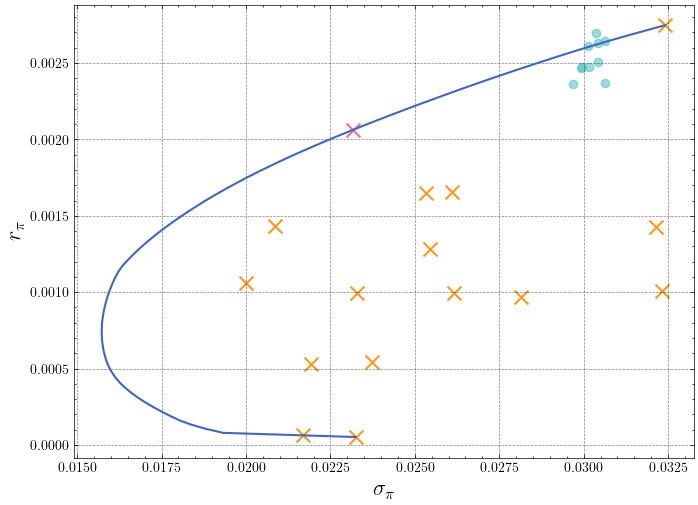

In [54]:
market.plot_efficient_frontier(stds = stds, returns = means)

### 25 Stocks

In [57]:
random.shuffle(stocks)
sampled_stocks_25 = stocks[:25]
factory = MarketFactory(sampled_stocks_25, "2017-01-01", "2021-04-30")

[*********************100%***********************]  25 of 25 completed


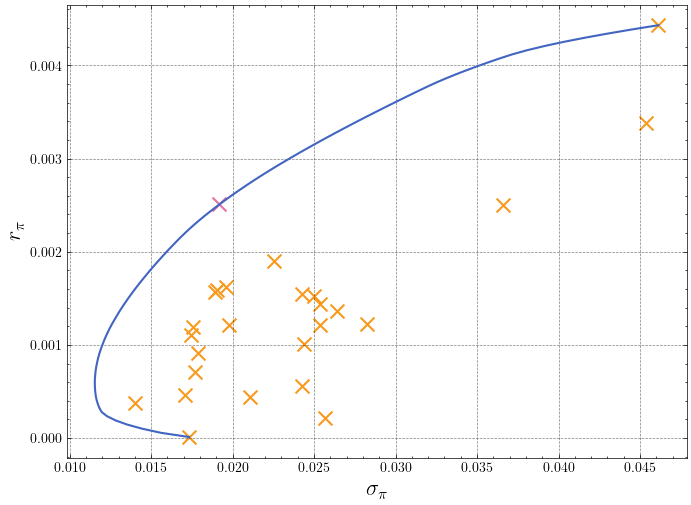

In [58]:
market = factory.create_market()
market.plot_efficient_frontier()

In [59]:
params = {
    'n_assets': len(sampled_stocks_25),
    'α': 10,
    'α_end': 1,
    'start_ep': 2000, 
    'α_decay_steps': 3000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 10000
}

p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 24.56it/s]
1it [03:45, 225.74s/it]


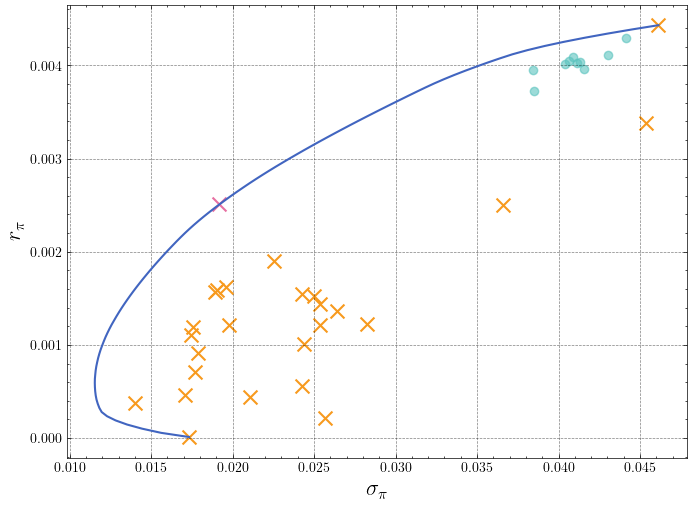

In [60]:
market.plot_efficient_frontier(stds = stds, returns = means)

### 50 Stocks 

In [61]:
random.shuffle(stocks)
sampled_stocks_50 = stocks[:50]
factory = MarketFactory(sampled_stocks_50, "2017-01-01", "2021-04-30")

[*********************100%***********************]  50 of 50 completed


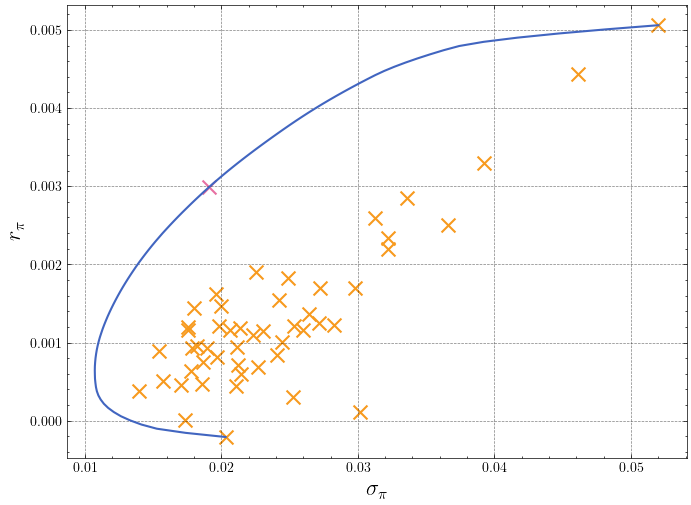

In [62]:
market = factory.create_market()
market.plot_efficient_frontier()

In [69]:
params = {
    'n_assets': len(sampled_stocks_50),
    'α': 10,
    'α_end': 2,
    'start_ep': 4000, 
    'α_decay_steps': 6000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 15000
}

p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 46.84it/s]
1it [07:11, 431.06s/it]


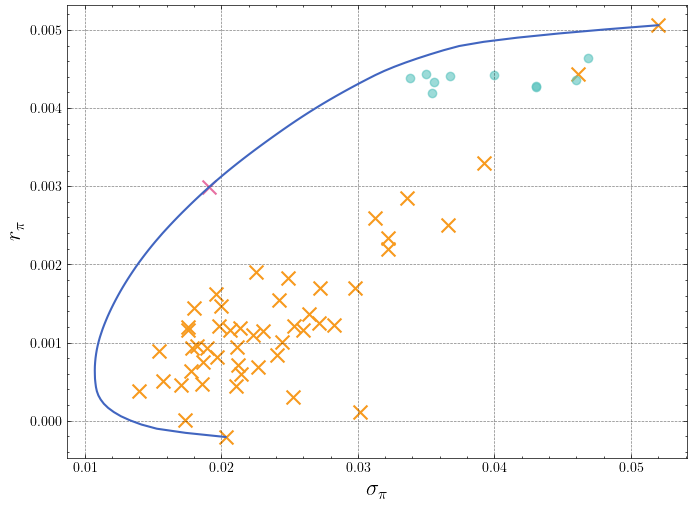

In [70]:
market.plot_efficient_frontier(stds = stds, returns = means)

### 100 Stocks

In [71]:
random.shuffle(stocks)
sampled_stocks_50 = stocks[:100]
factory = MarketFactory(sampled_stocks_50, "2017-01-01", "2021-04-30")

[*********************100%***********************]  100 of 100 completed


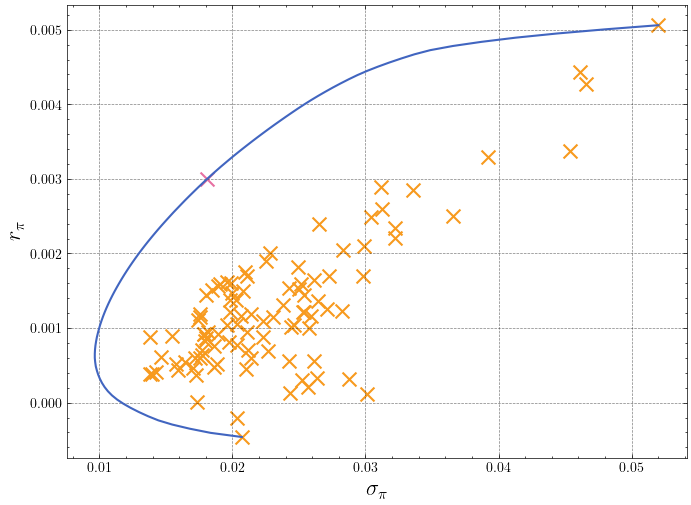

In [72]:
market = factory.create_market()
market.plot_efficient_frontier()

In [80]:
params = {
    'n_assets': len(sampled_stocks_50),
    'α': 20,
    'α_end': 2,
    'start_ep': 5000, 
    'α_decay_steps': 5000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 20000
}

p_runner = ParallelRunnerVec(market.μ, market.Σ, 8, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 8/8 [00:00<00:00, 1633.38it/s]
1it [20:01, 1201.95s/it]


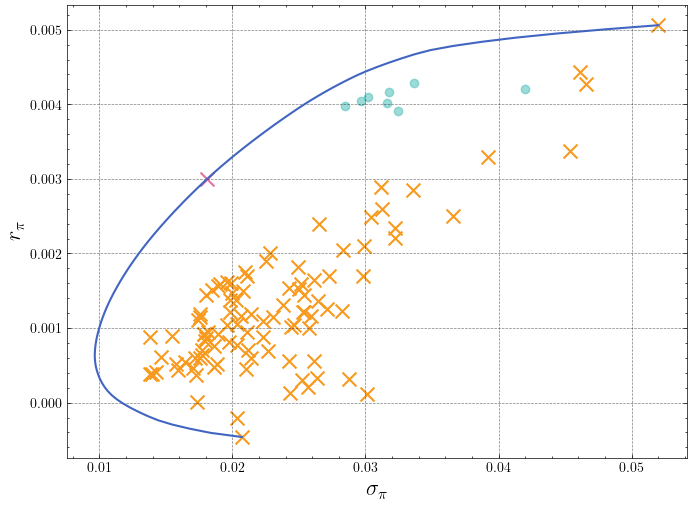

In [81]:
market.plot_efficient_frontier(stds = stds, returns = means)

## Maximising the Differential Sharpe Ratio of Real Stocks

The Sharpe ratio is a measure of risk-adjusted return. It is defined as 

$$S_t = \frac{\text{Ave}(R_t)}{\text{Std}(R_t)} $$

Moody et al. 1998 derive an online learning friendly objective called the *differential Sharpe ratio*. It is calculated using exponential moving averages of the returns and standard deviation of returns and then considering a first-order expansion around the decay rate.

$$S_t \approx S_{t-1} + \eta \left.  \frac{d S_t}{d \eta} \right|_{\eta=0} + \mathcal{O}(\eta^2)$$

The *differential Sharpe ratio* is then defined as 

$$D_t = \frac{d S_t}{d \eta} = \frac{B_{t-1} \Delta A_t - \frac{1}{2} A_{t-1} \Delta B_t}{(B_{t-1} - A^2_{t-1})^{\frac{3}{2}}}$$

Where $A_t$ and $B_t$ are exponential moving estimates of the first and second moments of the returns at time t or

$$A_t = A_{t-1} + \eta(R_t - A_{t-1})$$

$$B_t = B_{t-1} + \eta(R^2_t - B_{t-1})$$

### 10 Stocks

[*********************100%***********************]  10 of 10 completed


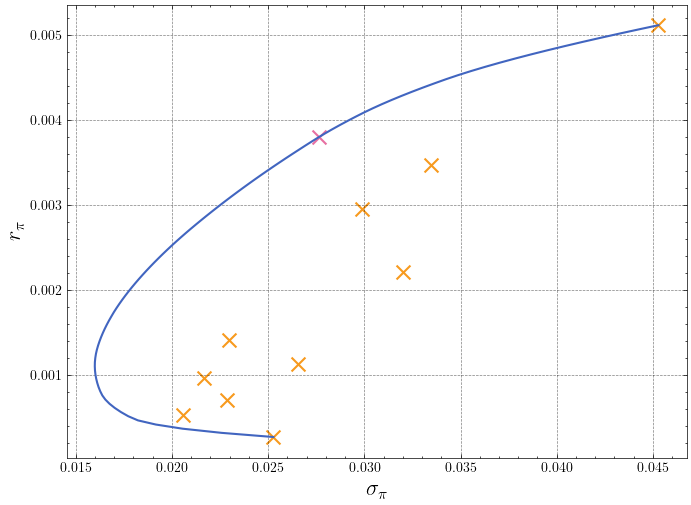

In [117]:
random.shuffle(stocks)
sampled_stocks = stocks[:10]
factory = MarketFactory(sampled_stocks, "2019-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [130]:
params_1 = {
    'n_assets': 10,
    'α': 0.005,
    'α_end': 0.002,
    'start_ep': 1000, 
    'α_decay_steps': 4000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 8000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3034.07it/s]
1it [06:03, 363.26s/it]


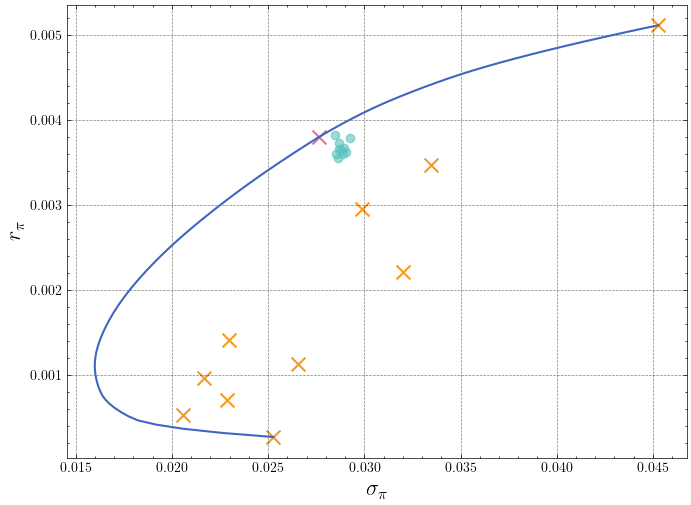

In [131]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
market.plot_efficient_frontier(stds=stds, returns=means)

In [62]:
random.shuffle(stocks)
sampled_stocks = stocks[:10]
factory = MarketFactory(sampled_stocks, "2019-01-01", "2021-04-30")

[*********************100%***********************]  10 of 10 completed


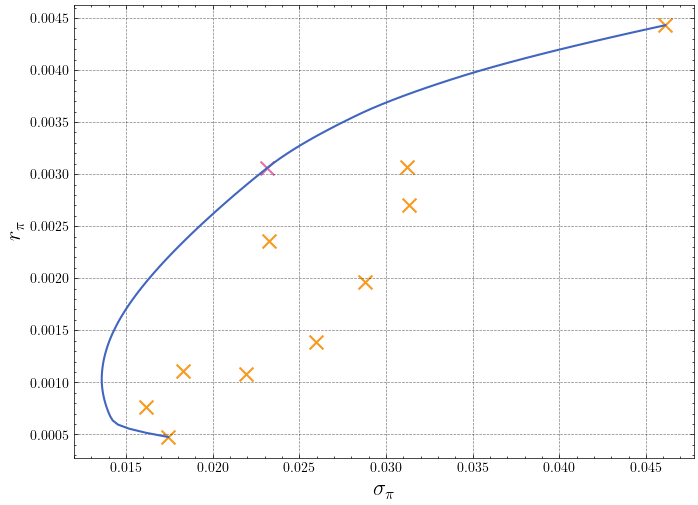

In [63]:
market = factory.create_market()
sr = market.plot_efficient_frontier()

In [96]:
params_1 = {
    'n_assets': 10,
    'α': 0.003,
    'α_end': 0.001,
    'start_ep': 1000, 
    'α_decay_steps': 3000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 10000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunnerVec(market.μ, market.Σ, 40, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

0it [00:00, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

 25%|██▌       | 10/40 [00:00<00:00, 69.80it/s]

 25%|██▌       | 10/40 [00:13<00:00, 69.80it/s]

 50%|█████     | 20/40 [05:42<03:25, 10.27s/it]

 75%|███████▌  | 30/40 [10:49<02:44, 16.42s/it]

100%|██████████| 40/40 [16:11<00:00, 24.29s/it]
1it [21:43, 1303.91s/it]


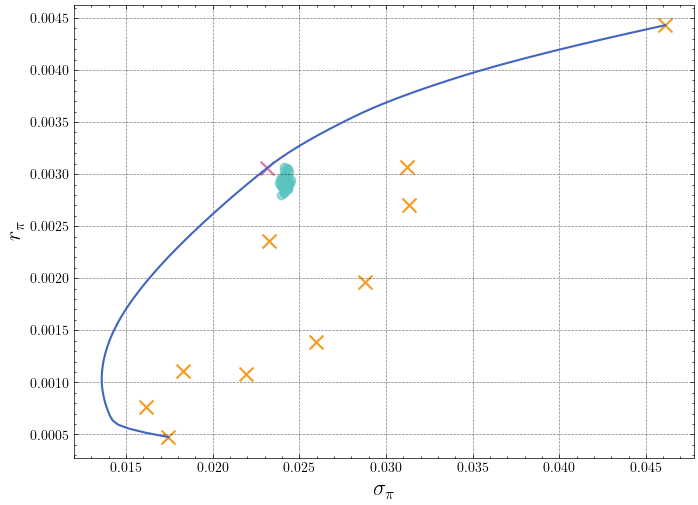

0.13216786633675448

In [97]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
market.plot_efficient_frontier(stds=stds, returns=means)

In [87]:
means_eq = []
stds_eq = []
for i in range(len(p_runner_eq.results['0'])):
    means_eq.append(np.mean(p_runner_eq.results['0'][i]))
    stds_eq.append(np.std(p_runner_eq.results['0'][i]))

In [98]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

In [99]:
sharpe = np.array(means)/np.array(stds)

In [100]:
sharpe_eq = np.array(means_eq)/np.array(stds_eq)

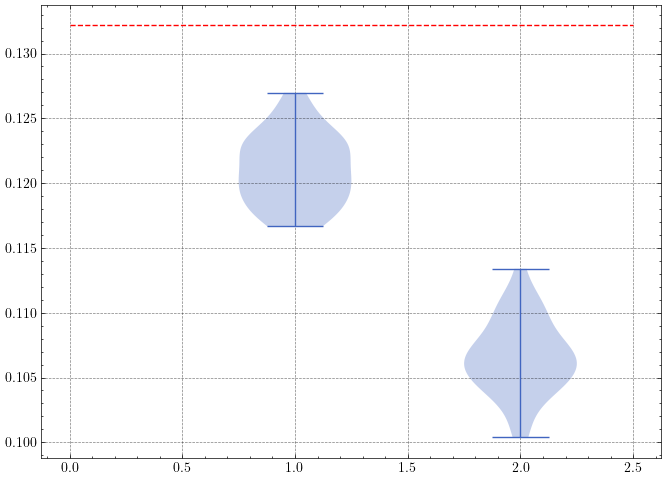

In [101]:
plt.figure(figsize=(8, 6), dpi=100)
plt.violinplot([sharpe, sharpe_eq]);
plt.hlines(y=sr, xmin=0, xmax=2.5, colors='r', linestyles='--')

### 15 Stocks

In [140]:
random.shuffle(stocks)
sampled_stocks = stocks[:15]
factory = MarketFactory(sampled_stocks, "2019-01-01", "2021-04-30")

[*********************100%***********************]  15 of 15 completed


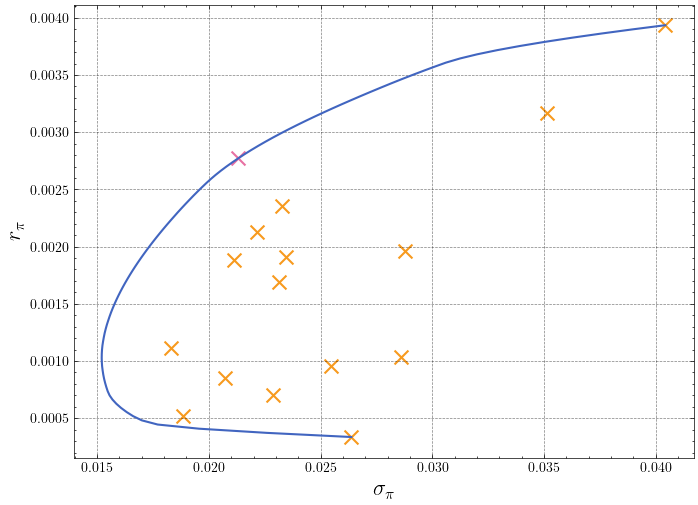

In [141]:
market = factory.create_market()
market.plot_efficient_frontier()

In [144]:
params_1 = {
    'n_assets': 15,
    'α': 0.005,
    'α_end': 0.001,
    'start_ep': 1000, 
    'α_decay_steps': 5000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 9000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3280.90it/s]
1it [07:18, 438.35s/it]


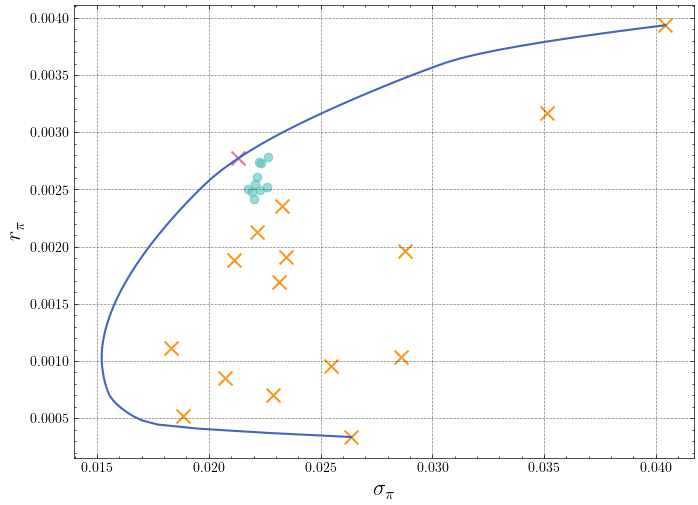

In [146]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
market.plot_efficient_frontier(stds=stds, returns=means)

### 25 Stocks

In [147]:
random.shuffle(stocks)
sampled_stocks = stocks[:25]
factory = MarketFactory(sampled_stocks, "2019-01-01", "2021-04-30")

[*********************100%***********************]  25 of 25 completed


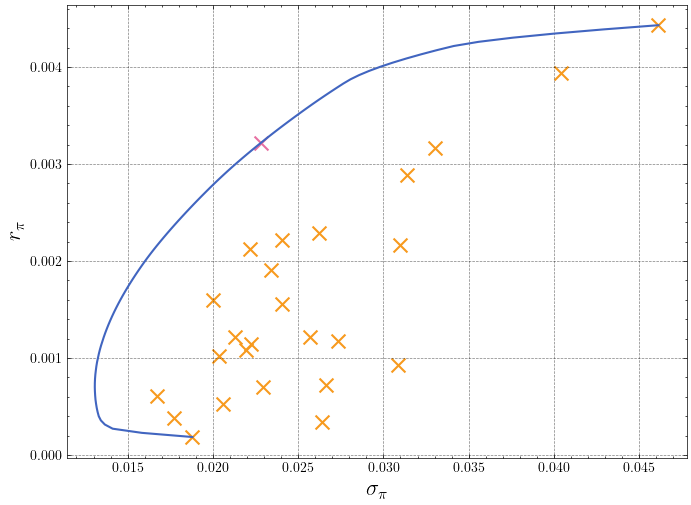

In [149]:
market = factory.create_market()
market.plot_efficient_frontier()

In [150]:
params_1 = {
    'n_assets': 25,
    'α': 0.005,
    'α_end': 0.001,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 15000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 1784.81it/s]
1it [13:00, 780.39s/it]


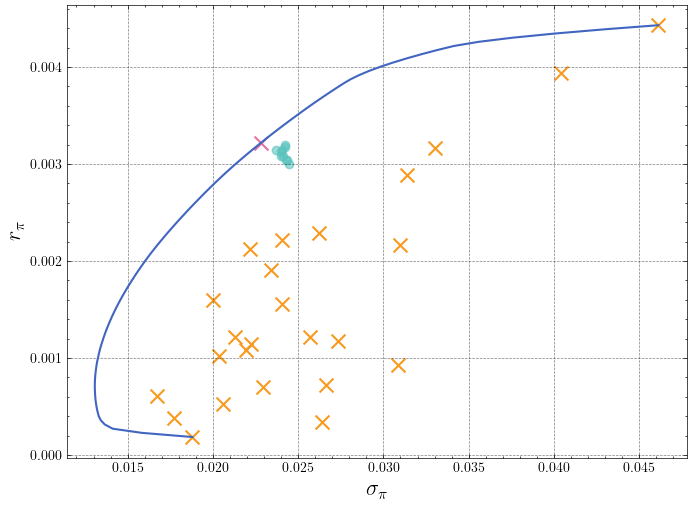

In [151]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
market.plot_efficient_frontier(stds=stds, returns=means)

### 50 Stocks 

In [152]:
random.shuffle(stocks)
sampled_stocks = stocks[:50]

[*********************100%***********************]  50 of 50 completed


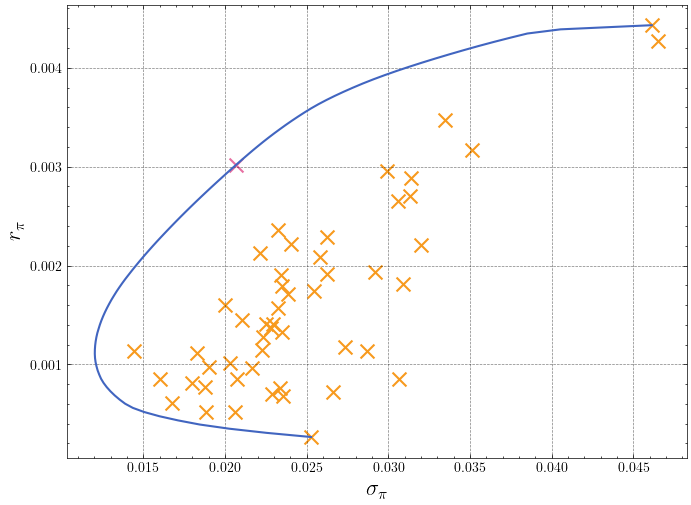

In [153]:
factory = MarketFactory(sampled_stocks, "2019-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [155]:
params_1 = {
    'n_assets': 50,
    'α': 0.005,
    'α_end': 0.001,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 20000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 58.32it/s]
1it [26:01, 1561.05s/it]


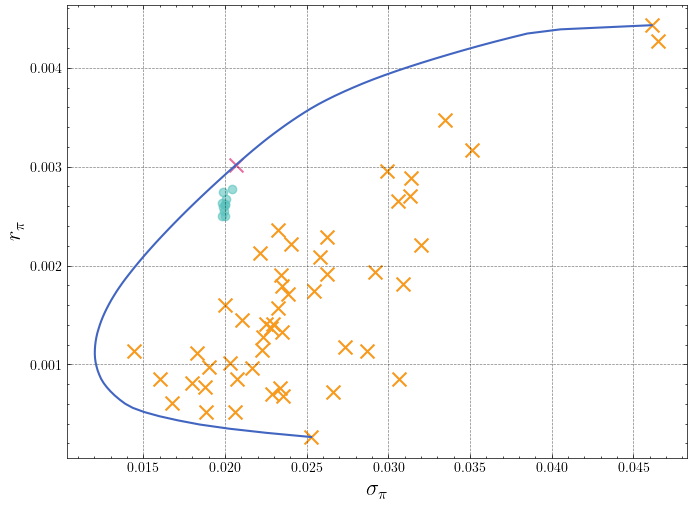

In [156]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
market.plot_efficient_frontier(stds=stds, returns=means)

### 100 Stocks 

In [157]:
random.shuffle(stocks)
sampled_stocks = stocks[:100]

[*********************100%***********************]  100 of 100 completed


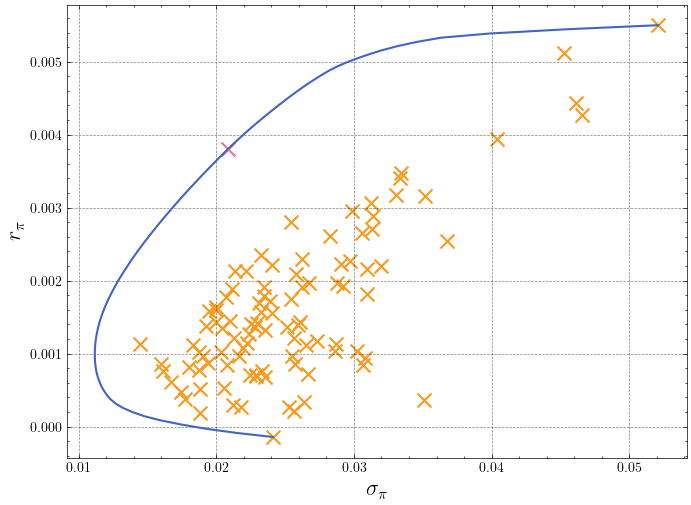

In [158]:
factory = MarketFactory(sampled_stocks, "2019-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [161]:
params_1 = {
    'n_assets': 100,
    'α': 0.02,
    'α_end': 0.001,
    'start_ep': 6000, 
    'α_decay_steps': 6000,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 20000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunnerVec(market.μ, market.Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 1746.75it/s]
1it [1:12:43, 4363.90s/it]


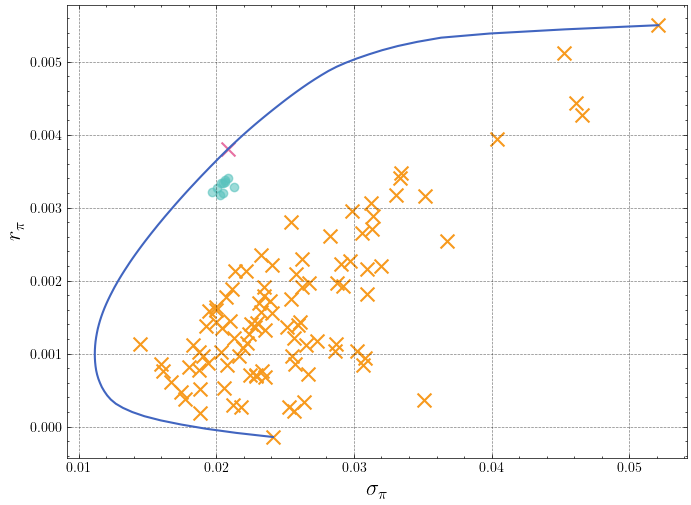

In [162]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
market.plot_efficient_frontier(stds=stds, returns=means)